# Exploratory Data Analysis on Heart Health
This dataset contains information related to **heart health parameters**

Each record in the dataset corresponds to an individual patien

In [192]:
# Load required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# panda datafram 
df=pd.read_csv("Medicaldataset.csv")

In [6]:
#  Understanding data 
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [23]:
df.shape

(1319, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [160]:
df.value_counts(["Gender","Result"])

Gender  Result  
1       positive    563
        negative    307
0       positive    247
        negative    202
Name: count, dtype: int64

In [195]:
# Check missing value
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [25]:
# Descriptive statistics
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


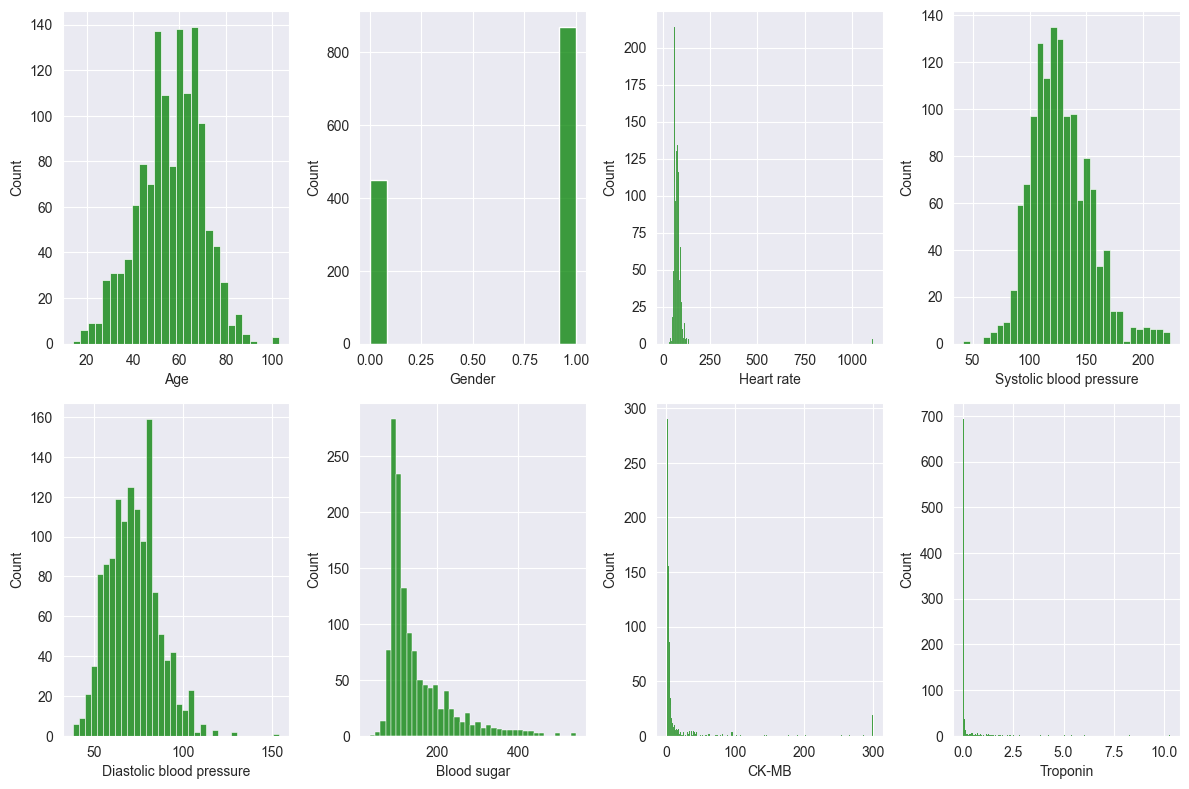

In [64]:
# getting to know distributuuion of feaatures: 

numerical_col=df.describe().columns
r=1
plt.figure(figsize=(12, 8)) 
for i in numerical_col:
    plt.subplot(2,4,r)
    sns.histplot(df,x=i, color="green" )
    plt.grid(True)
    r+=1
plt.tight_layout()
plt.show()
    

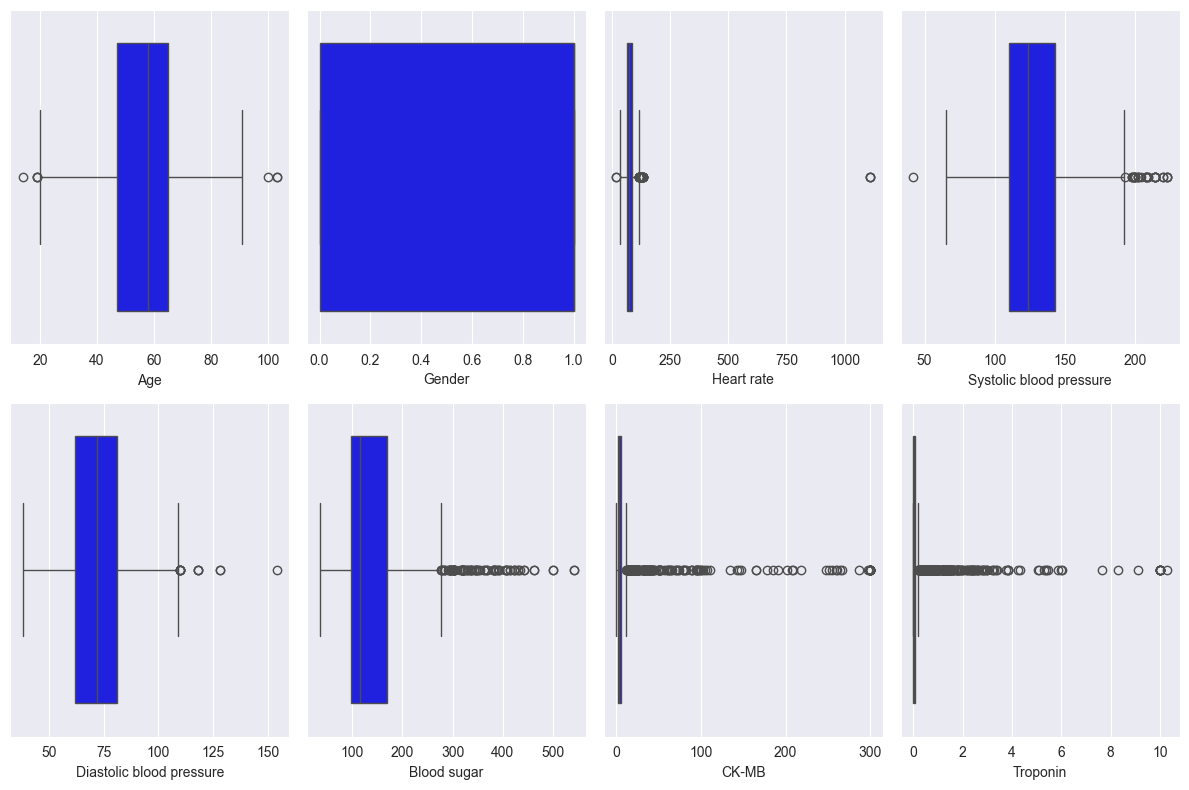

In [105]:
# getting to know Range of data: 

numerical_col=df.describe().columns
r=1
plt.figure(figsize=(12, 8)) 
sns.set_style("darkgrid")
for i in numerical_col:
    plt.subplot(2,4,r)
    sns.boxplot(df,x=i, color="blue" )
    
    r+=1
plt.tight_layout()
plt.show()
    

<function matplotlib.pyplot.show(close=None, block=None)>

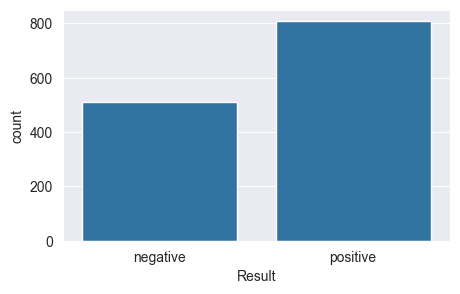

In [121]:
# Result column dist of Pos & Neg 
plt.figure(figsize=(5,3)) 
sns.countplot(df, x=df["Result"])
plt.show

In [89]:
# Finding out some outliers by  95 % Quantile :
print( "95 % Quantile of Age :" ,df["Age"].quantile(0.95) )
print( "95 % Quantile of Heart rate :" ,df["Heart rate"].quantile(0.95))
print( "95 % Quantile of Systolic blood pressure :",df["Systolic blood pressure"].quantile(0.95))
print( "95 % Quantile of Systolic blood pressure :",df["Systolic blood pressure"].quantile(0.95))
print( "95 % Quantile of Diastolic blood pressure :",df["Diastolic blood pressure"].quantile(0.95))
print( "95 % Quantile of Blood sugar :",df["Blood sugar"].quantile(0.95))

95 % Quantile of Age : 76.0
95 % Quantile of Heart rate : 103.0
95 % Quantile of Systolic blood pressure : 170.0999999999999
95 % Quantile of Systolic blood pressure : 170.0999999999999
95 % Quantile of Diastolic blood pressure : 95.09999999999991
95 % Quantile of Blood sugar : 305.8999999999992


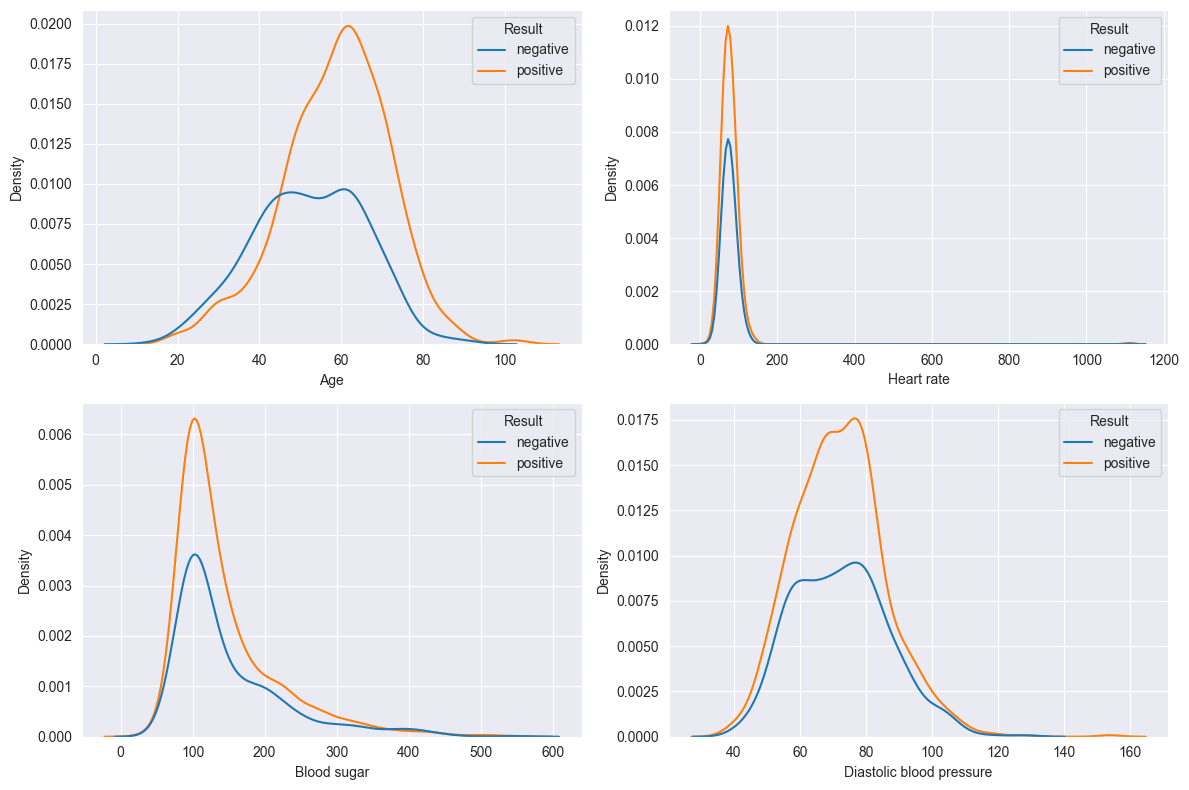

In [119]:
# Plot of categprical feature ( Result) 
# probability Dist of features on getting Pos or neg Heart issue result

plt.figure(figsize=(12,8)) 
r=1
for i in ["Age","Heart rate","Blood sugar","Diastolic blood pressure"]:
    plt.subplot(2,2,r)
    sns.kdeplot(df, x=i, hue="Result")
    r+=1
    
plt.tight_layout()
plt.show()

## Sumarize by Aggregation and Pivot table : 


In [144]:
df.groupby("Result").agg(["median","min","max"])

Age          Gender         Heart rate            \
         median min  max median min max     median min   max   
Result                                                         
negative   52.0  14   91    1.0   0   1       75.0  20  1111   
positive   60.0  19  103    1.0   0   1       74.0  20  1111   

         Systolic blood pressure  ... Diastolic blood pressure Blood sugar  \
                          median  ...                      max      median   
Result                            ...                                        
negative                   125.0  ...                      128       117.0   
positive                   122.0  ...                      154       116.0   

                       CK-MB                Troponin               
           min    max median    min     max   median    min   max  
Result                                                             
negative  60.0  541.0  2.310  0.321    7.02    0.006  0.001  10.0  
positive  35.0  541.0  3.775  0.353  300.00    0.044  0.003  10.3  

[2 rows x 24 columns]

In [149]:
df_pivot = df.pivot_table(index='Result', columns='Gender', values=['Age', 'Heart rate', 'Systolic blood pressure'], aggfunc='median')
print(df_pivot)

                Age            Heart rate            Systolic blood pressure  \
Gender            0          1          0          1                       0   
Result                                                                         
negative  53.846535  50.951140  81.202970  75.703583              127.732673   
positive  61.340081  57.635879  79.489879  78.238011              125.979757   

                      
Gender             1  
Result                
negative  127.938111  
positive  127.072824  


In [180]:
df["Mapped_result"]=df["Result"].map({"negative":0 , "positive":1})
df_numerical=df.drop("Result", axis=1)

In [188]:
df_numerical.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Mapped_result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0


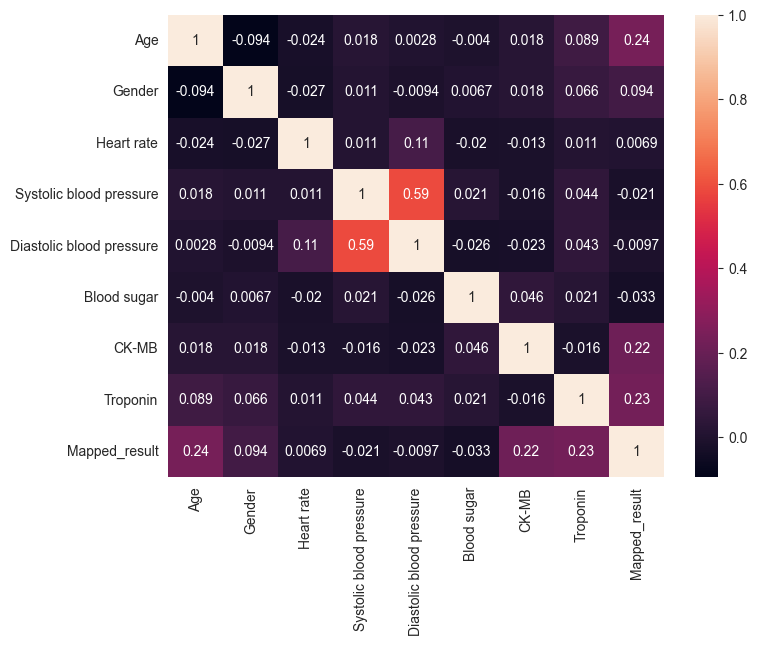

In [187]:
plt.figure(figsize=(8,6))
sns.heatmap(df_numerical.corr(), annot=True )
plt.show()

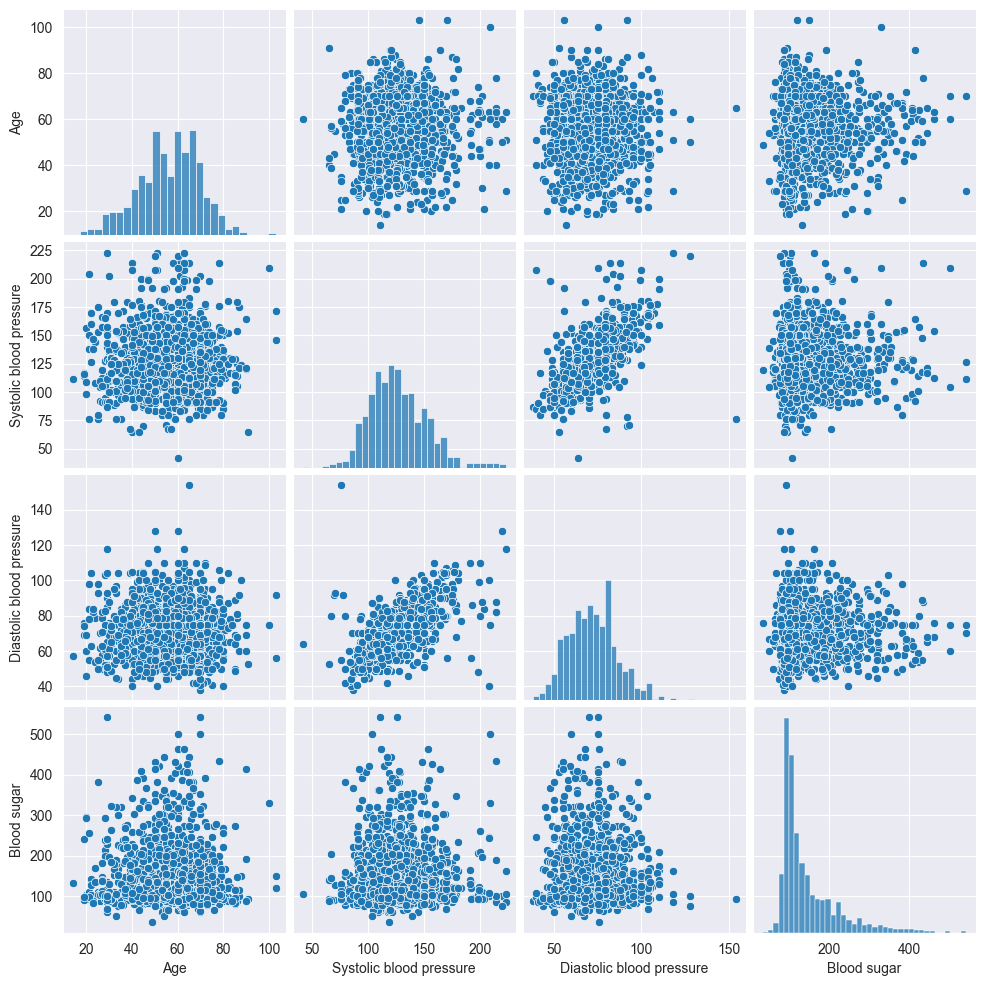

In [191]:
sns.pairplot(df, vars=["Age","Systolic blood pressure","Diastolic blood pressure","Blood sugar"])
plt.show()

## Key Insights: 
**The target variable** (`Result`) is imbalanced, with more positive cases compared to negative ones, suggesting the need for techniques to handle class imbalance in predictive models.

**Age**  having a **median** of 58, first quartilr **Q1**: 47 , 
third quartile **Q3**: 65 , shows that most indivuduals belongs to midlled age group 45-65

A strong **correlation coefficient** between ***Systolic and Diastolic blood pressure*** is observed, indicating a significant **relationship** between these two variables.

There is noticeable **increase in chance of heart disease** beyond age of 42

The positive cases peaks higher than negative cases around **60-90 mmHg**, indicating a **higher concentration of individuals diagnosed** with a heart issue in this pressure range.